<a href="https://colab.research.google.com/github/Aditya-Naik13/NFLR-BIG/blob/main/NFL_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loads the Google Drive using the Python Runtime. Other code blocks are executed using the R runtime.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
install.packages("summarytools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘magick’


Warning message in install.packages("summarytools"):
“installation of package ‘magick’ had non-zero exit status”
Warning message in install.packages("summarytools"):
“installation of package ‘summarytools’ had non-zero exit status”


In [ ]:
install.packages("knitr")
install.packages("kableExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’




In [ ]:
install.packages("gganimate")
install.packages("gifski")
install.packages("transformr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘sf’, ‘lpSolve’, ‘transformr’, ‘tweenr’


Warning message in install.packages("gganimate"):
“installation of package ‘s2’ had non-zero exit status”
Warning message in install.packages("gganimate"):
“installation of package ‘classInt’ had non-zero exit status”
Warning message in install.packages("gganimate"):
“installation of package ‘sf’ had non-zero exit status”
Warning message in install.packages("gganimate"):
“installation of package ‘transformr’ had non-zero exit status”
Warning message in install.packages("gganimate"):
“installation of package ‘gganimate’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("gifski"):
“installation of package ‘gifski’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-lib

In [ ]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Load the datasets
games <- read.csv("gdrive/MyDrive/nfl/Games.csv")
player_plays <- read.csv("gdrive/MyDrive/nfl/Player-Plays.csv")
players <- read.csv("gdrive/MyDrive/nfl/Players.csv")
week1 <- read.csv("gdrive/MyDrive/nfl/Week1.csv")

# --- 1. Basic Summary Statistics ---
# Games dataset summary
cat("Summary of Games dataset:\n")
print(summary(games))

# Player-Plays dataset summary
cat("\nSummary of Player-Plays dataset:\n")
print(summary(player_plays))

# Players dataset summary
cat("\nSummary of Players dataset:\n")
print(summary(players))

# Week1 dataset summary
cat("\nSummary of Week 1 dataset:\n")
print(summary(week1))

Summary of Games dataset:
     gameId              season          week         gameDate        
 Min.   :2.022e+09   Min.   :2022   Min.   :1.000   Length:136        
 1st Qu.:2.022e+09   1st Qu.:2022   1st Qu.:3.000   Class :character  
 Median :2.022e+09   Median :2022   Median :5.000   Mode  :character  
 Mean   :2.022e+09   Mean   :2022   Mean   :4.846                     
 3rd Qu.:2.022e+09   3rd Qu.:2022   3rd Qu.:7.000                     
 Max.   :2.022e+09   Max.   :2022   Max.   :9.000                     
 gameTimeEastern    homeTeamAbbr       visitorTeamAbbr    homeFinalScore 
 Length:136         Length:136         Length:136         Min.   : 3.00  
 Class :character   Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Mode  :character   Median :22.50  
                                                          Mean   :22.67  
                                                          3rd Qu.:27.00  
                                 

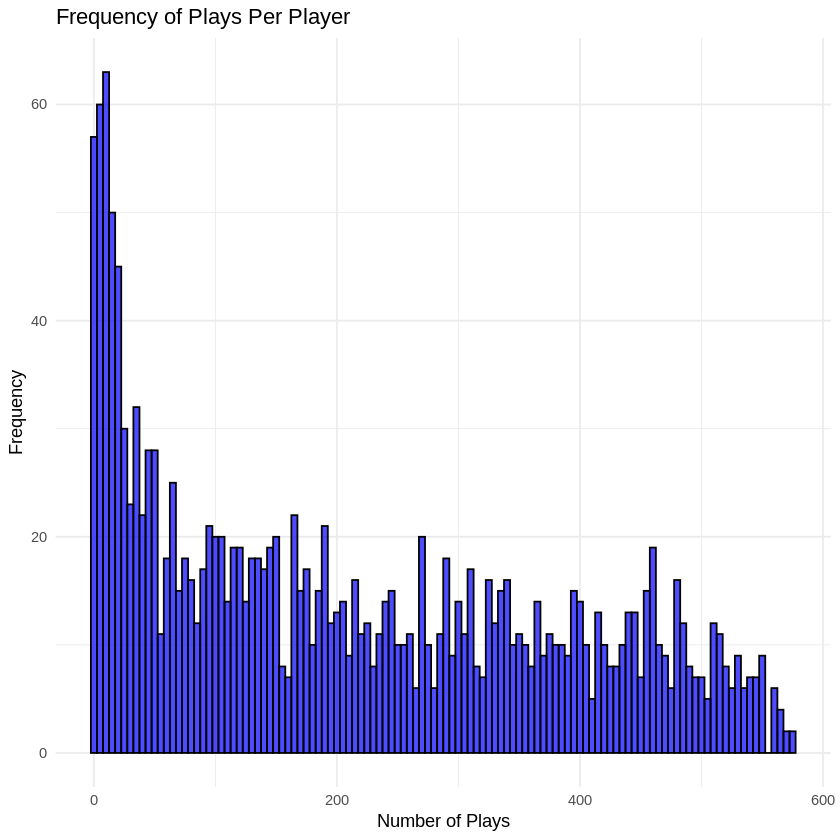

In [ ]:
# Frequency of plays per player
play_count <- player_plays %>%
  group_by(nflId) %>%
  summarize(Play_Count = n())

# Plot frequency of plays per player
ggplot(play_count, aes(x = Play_Count)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) +
  theme_minimal() +
  labs(
    title = "Frequency of Plays Per Player",
    x = "Number of Plays",
    y = "Frequency"
  )


In [ ]:
# Example: Player-Plays dataset
player_stats <- player_plays %>%
  summarise(
    Mean_Rushing_Yards = mean(rushingYards, na.rm = TRUE),
    Median_Rushing_Yards = median(rushingYards, na.rm = TRUE),
    SD_Rushing_Yards = sd(rushingYards, na.rm = TRUE),
    Mode_Rushing_Yards = as.numeric(names(sort(table(rushingYards), decreasing = TRUE)[1]))
  )

cat("\nKey Statistics for Player-Plays dataset:\n")
print(player_stats)



Key Statistics for Player-Plays dataset:
  Mean_Rushing_Yards Median_Rushing_Yards SD_Rushing_Yards Mode_Rushing_Yards
1         0.08730376                    0         1.098183                  0


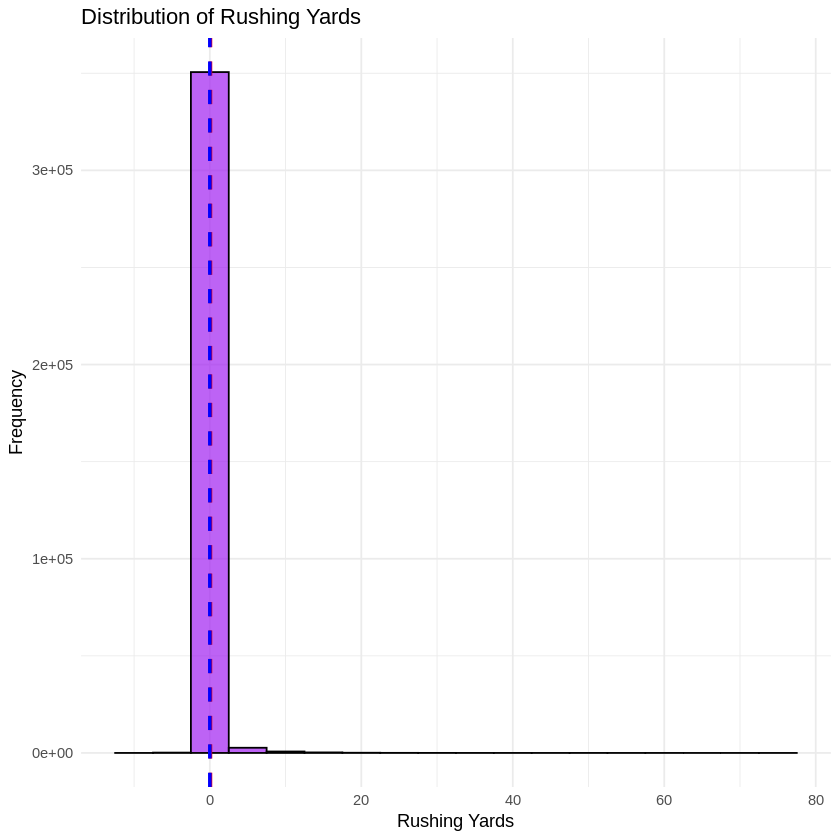

In [ ]:
if("rushingYards" %in% colnames(player_plays)) {
  ggplot(player_plays, aes(x = rushingYards)) +
    geom_histogram(binwidth = 5, fill = "purple", color = "black", alpha = 0.7) +
    theme_minimal() +
    labs(
      title = "Distribution of Rushing Yards",
      x = "Rushing Yards",
      y = "Frequency"
    ) +
    geom_vline(aes(xintercept = mean(rushingYards, na.rm = TRUE)), color = "red", linetype = "dashed", linewidth = 1) +
    geom_vline(aes(xintercept = median(rushingYards, na.rm = TRUE)), color = "blue", linetype = "dashed", linewidth = 1)
} else {
  cat("Column 'rushingYards' not found in player_plays dataset.\n")
}


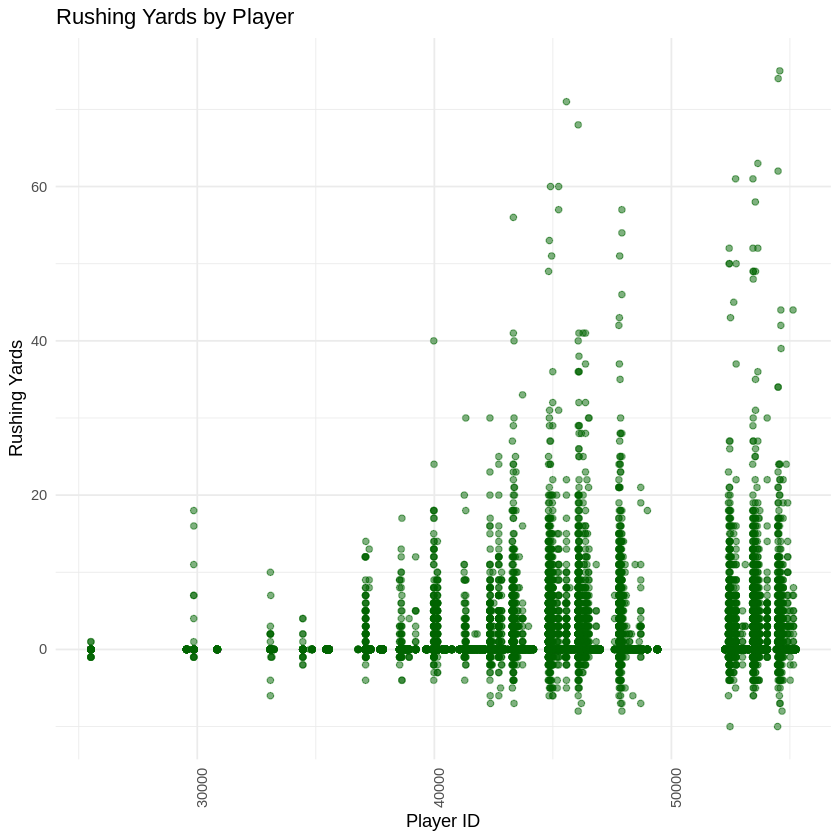

In [ ]:
if("rushingYards" %in% colnames(player_plays) && "nflId" %in% colnames(player_plays)) {
  ggplot(player_plays, aes(x = nflId, y = rushingYards)) +
    geom_point(color = "darkgreen", alpha = 0.5) +
    theme_minimal() +
    labs(
      title = "Rushing Yards by Player",
      x = "Player ID",
      y = "Rushing Yards"
    ) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
} else {
  cat("Column 'rushingYards' or 'nflId' not found in player_plays dataset.\n")
}


In [ ]:
# Function to calculate missing values for a data frame
calculate_missing_values <- function(df) {
  # Calculate the number of missing values for each column
  missing_counts <- colSums(is.na(df))

  # Create a data frame with the results
  missing_df <- data.frame(
    Column = names(missing_counts),
    Missing_Count = missing_counts,
    Missing_Percentage = round((missing_counts / nrow(df)) * 100, 2)
  )

  # Return the data frame
  return(missing_df)
}

# Load the datasets
games <- read.csv("gdrive/MyDrive/nfl/Games.csv")
player_plays <- read.csv("gdrive/MyDrive/nfl/Player-Plays.csv")
players <- read.csv("gdrive/MyDrive/nfl/Players.csv")

# Calculate missing values for each dataset
missing_games <- calculate_missing_values(games)
missing_player_plays <- calculate_missing_values(player_plays)
missing_players <- calculate_missing_values(players)

# Print the results without repeating column names
cat("Missing values in Games.csv:\n")
print(missing_games, row.names = FALSE)  # Suppress row names

cat("\nMissing values in Player-Plays.csv:\n")
print(missing_player_plays, row.names = FALSE)  # Suppress row names

cat("\nMissing values in Players.csv:\n")
print(missing_players, row.names = FALSE)  # Suppress row names

Missing values in Games.csv:
            Column Missing_Count Missing_Percentage
            gameId             0                  0
            season             0                  0
              week             0                  0
          gameDate             0                  0
   gameTimeEastern             0                  0
      homeTeamAbbr             0                  0
   visitorTeamAbbr             0                  0
    homeFinalScore             0                  0
 visitorFinalScore             0                  0

Missing values in Player-Plays.csv:
                                     Column Missing_Count Missing_Percentage
                                     gameId             0               0.00
                                     playId             0               0.00
                                      nflId             0               0.00
                                   teamAbbr             0               0.00
                             

In [ ]:
# Function to calculate missing values for a data frame
calculate_missing_values <- function(df) {
  # Calculate the number of missing values for each column
  missing_counts <- colSums(is.na(df))

  # Create a data frame with the results
  missing_df <- data.frame(
    Column = names(missing_counts),
    Missing_Count = missing_counts,
    Missing_Percentage = round((missing_counts / nrow(df)) * 100, 2)
  )

  return(missing_df)
}

# Load the datasets
games <- read.csv("gdrive/MyDrive/nfl/Games.csv")
player_plays <- read.csv("gdrive/MyDrive/nfl/Player-Plays.csv")
players <- read.csv("gdrive/MyDrive/nfl/Players.csv")
week1 <- read.csv("gdrive/MyDrive/nfl/Week1.csv") # Load Week1.csv

# Calculate missing values for each dataset
missing_games <- calculate_missing_values(games)
missing_player_plays <- calculate_missing_values(player_plays)
missing_players <- calculate_missing_values(players)
missing_week1 <- calculate_missing_values(week1) # Calculate for Week1.csv

cat("Missing values in Games.csv:\n")
print(missing_games, row.names = FALSE)

cat("\nMissing values in Player-Plays.csv:\n")
print(missing_player_plays, row.names = FALSE)

cat("\nMissing values in Players.csv:\n")
print(missing_players, row.names = FALSE)

cat("\nMissing values in Week1.csv:\n")
print(missing_week1, row.names = FALSE) # Print for Week1.csv

Missing values in Games.csv:
            Column Missing_Count Missing_Percentage
            gameId             0                  0
            season             0                  0
              week             0                  0
          gameDate             0                  0
   gameTimeEastern             0                  0
      homeTeamAbbr             0                  0
   visitorTeamAbbr             0                  0
    homeFinalScore             0                  0
 visitorFinalScore             0                  0

Missing values in Player-Plays.csv:
                                     Column Missing_Count Missing_Percentage
                                     gameId             0               0.00
                                     playId             0               0.00
                                      nflId             0               0.00
                                   teamAbbr             0               0.00
                             

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


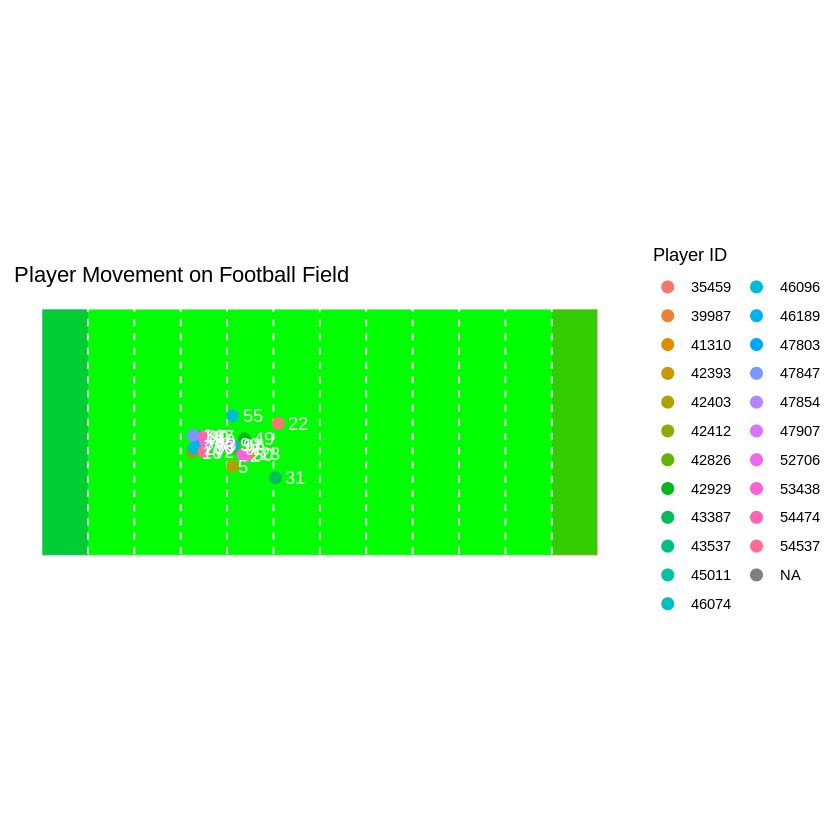

In [ ]:

library(ggplot2)
library(dplyr)

week1_data <- read.csv("gdrive/MyDrive/nfl/Week1.csv")

# Filter data for a specific game and play
game_id <- 2022091200
play_id <- 64

filtered_data <- week1_data %>%
  filter(gameId == game_id, playId == play_id)

# Draw the football field
draw_field <- function() {
  ggplot() +
    # Field outline
    geom_rect(aes(xmin = 0, xmax = 120, ymin = 0, ymax = 53.3), fill = "green", color = "white") +
    # End zones
    geom_rect(aes(xmin = 0, xmax = 10, ymin = 0, ymax = 53.3), fill = "blue", alpha = 0.2) +
    geom_rect(aes(xmin = 110, xmax = 120, ymin = 0, ymax = 53.3), fill = "red", alpha = 0.2) +
    # Yard lines
    geom_vline(xintercept = seq(10, 110, by = 10), color = "white", linetype = "dashed") +
    # Labels
    labs(title = "Player Movement on Football Field",
         x = "Yard Line",
         y = "Field Width") +
    theme_minimal() +
    theme(panel.grid = element_blank(),
          axis.text = element_blank(),
          axis.title = element_blank())
}

# Add player positions
plot_player_positions <- function(frame_data) {
  draw_field() +
    geom_point(data = frame_data, aes(x = x, y = y, color = as.factor(nflId)), size = 3) +
    geom_text(data = frame_data, aes(x = x, y = y, label = jerseyNumber), hjust = -0.5, color = "white") +
    scale_color_discrete(name = "Player ID") +
    coord_fixed(ratio = 1)
}

# Visualize a single frame
frame_id <- 1  # Change this to visualize different moments in time
frame_data <- filtered_data %>%
  filter(frameId == frame_id)

plot <- plot_player_positions(frame_data)
print(plot)


In [ ]:
install.packages("gganimate", dependencies = FALSE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(dplyr)
library(gganimate)

week1_data <- read.csv("gdrive/MyDrive/nfl/Week1.csv")

# Filter data for a specific game
game_id <- 2022091200  # Replace with the desired gameId
filtered_data <- week1_data %>%
  filter(gameId == game_id)

# Draw the football field
draw_field <- function() {
  ggplot() +
    # Field outline
    geom_rect(aes(xmin = 0, xmax = 120, ymin = 0, ymax = 53.3), fill = "green", color = "white") +
    # End zones
    geom_rect(aes(xmin = 0, xmax = 10, ymin = 0, ymax = 53.3), fill = "blue", alpha = 0.2) +
    geom_rect(aes(xmin = 110, xmax = 120, ymin = 0, ymax = 53.3), fill = "red", alpha = 0.2) +
    # Yard lines
    geom_vline(xintercept = seq(10, 110, by = 10), color = "white", linetype = "dashed") +
    # Labels
    labs(title = "Player Movement for Game {frame_time}",
         x = "Yard Line",
         y = "Field Width") +
    theme_minimal() +
    theme(panel.grid = element_blank(),
          axis.text = element_blank(),
          axis.title = element_blank())
}

player_animation <- filtered_data %>%
  ggplot(aes(x = x, y = y, group = nflId, color = as.factor(nflId))) +
  draw_field() +
  geom_path(size = 1, alpha = 0.8) +
  geom_point(size = 2) +
  scale_color_discrete(name = "Player ID") +
  coord_fixed(ratio = 1) +
  transition_time(frameId) +
  labs(subtitle = "Frame: {frame_time}") +
  ease_aes('linear')

animate(player_animation, width = 800, height = 400, fps = 10, duration = 20, renderer = gifski_renderer("player_movement.gif"))

animate(player_animation, nframes = 200, fps = 10)


ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[1m[22m[33m![39m Can't add `draw_field()` to a [34m<ggplot>[39m object.


In [ ]:

library(ggplot2)
library(dplyr)


week1_data <- read.csv("gdrive/MyDrive/nfl/Week1.csv")


game_id <- 2022091200
filtered_data <- week_1 %>% filter(gameId == game_id)

ggplot(data = filtered_data, aes(x = x, y = y, group = nflId, color = as.factor(nflId))) +
  geom_path(size = 0.8) +
  coord_fixed() +
  labs(
    title = paste("Player Movements for Game ID:", game_id),
    x = "Field Length (yards)",
    y = "Field Width (yards)",
    color = "Player ID"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
  ) +
  annotate("rect", xmin = 0, xmax = 10, ymin = 0, ymax = 53.3, alpha = 0.2, fill = "blue") +  # End zones
  annotate("rect", xmin = 110, xmax = 120, ymin = 0, ymax = 53.3, alpha = 0.2, fill = "red")  # Opposite end zone


ERROR: Error: object 'week_1' not found


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


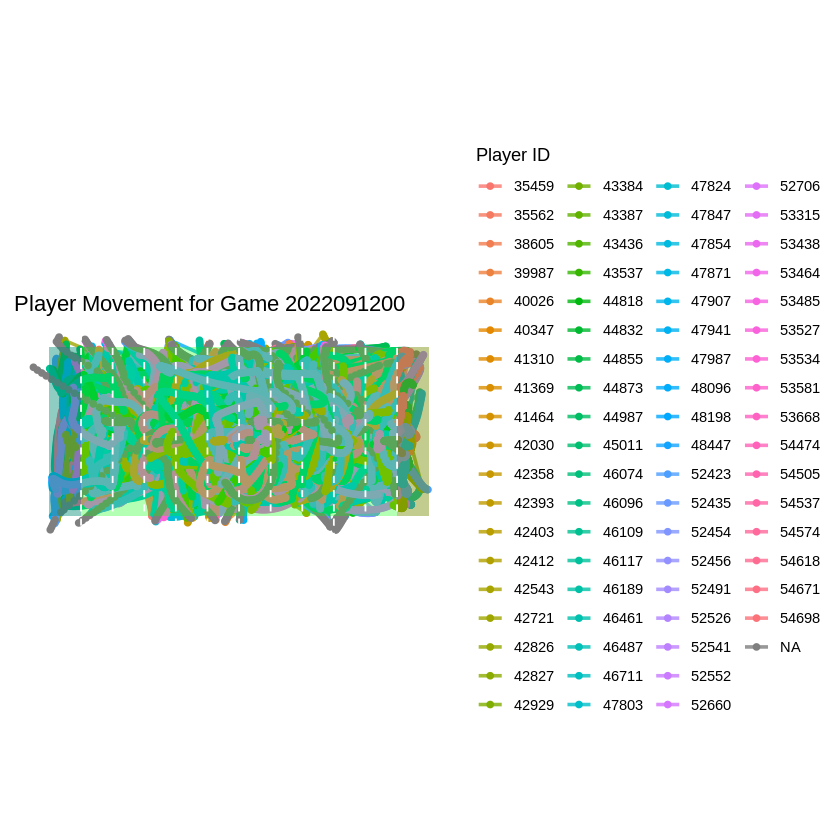

In [ ]:

library(ggplot2)
library(dplyr)

week1_data <- read.csv("gdrive/MyDrive/nfl/Week1.csv")

# specific game
game_id <- 2022091200  # Replace with the desired gameId
filtered_data <- week1_data %>%
  filter(gameId == game_id)

ggplot(filtered_data, aes(x = x, y = y, group = nflId, color = as.factor(nflId))) +
  geom_path(size = 1, alpha = 0.8) +
  geom_point(size = 1.5) +
  annotate("rect", xmin = 0, xmax = 120, ymin = 0, ymax = 53.3, fill = "green", alpha = 0.3) +  # Field outline
  annotate("rect", xmin = 0, xmax = 10, ymin = 0, ymax = 53.3, fill = "blue", alpha = 0.2) +  # Left end zone
  annotate("rect", xmin = 110, xmax = 120, ymin = 0, ymax = 53.3, fill = "red", alpha = 0.2) + # Right end zone
  geom_vline(xintercept = seq(10, 110, by = 10), color = "white", linetype = "dashed") + # Yard lines
  # Formatting
  coord_fixed(ratio = 1) +
  labs(title = paste("Player Movement for Game", game_id),
       x = "Yard Line", y = "Field Width", color = "Player ID") +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.text = element_blank(),
        axis.title = element_blank())
